# COVID-19 Prediction

## Data


In [15]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import codebase
from codebase.data_generation import *
from codebase.sparse_regression import *
from codebase.utils import *

In [17]:
# dataset = CountryDataset()
py_odes = loadmat('data/py_odes.mat')

lorenz = py_odes['lorenz']

In [9]:
values = dataset.get_cumulative('France', rescaling=1000)
values = values.reshape(-1, 1)

In [20]:
values = lorenz
dm, m = make_targets(values, derivative=False)
derivatives, m = make_targets(values, deriv:=True)
X, _ = make_polynomials(m, max_degree=4)
dweights, _ = sparse_regression(X, derivatives, cutoff=1e-30)
weights, _ = sparse_regression(X, dm, cutoff=1e-30)

show_weights(dweights, derivative=True)
show_weights(weights, derivative=False)

| function   |    $\dot{x}$ |    $\dot{y}$ |    $\dot{z}$ |
|:-----------|-------------:|-------------:|-------------:|
| $1$        |  2.04917e-05 |  9.33114e-05 | -0.000221666 |
| $ x$       |  0.000556543 |  0.000879699 | -8.13556e-05 |
| $ y$       |  0.00149096  |  0.00209904  | -0.00013565  |
| $ z$       |  0.000202731 |  0.000755509 | -0.00184169  |
| $ x^2$     | -0.000290661 | -1.58247e-05 | -0.000590203 |
| $ x y$     | -1.00534e-05 |  0.000223301 | -0.000930689 |
| $ x z$     |  0.00166347  |  0.00359042  | -0.000424286 |
| $ y^2$     | -0.000306339 |  0.000300404 | -0.0020668   |
| $ y z$     |  0.00853847  |  0.0121624   | -0.000731004 |
| $ z^2$     |  0.0014171   |  0.00401116  | -0.0101601   |
| $ x^3$     |  0.00978983  |  0.00786461  | -0.000338569 |
| $ x^2 y$   | -0.00564967  | -0.0104584   | -0.000229195 |
| $ x^2 z$   | -0.00201444  |  0.00105418  | -0.00236593  |
| $ x y^2$   | -0.00876071  | -0.0139154   |  0.000273441 |
| $ x y z$   |  0.0027463   |  0.00241425  |  0.00196766  |
| $ x z^2$   | -0.0014611   |  0.00255196  |  0.000151971 |
| $ y^3$     |  0.00470496  |  0.00886253  |  5.96224e-06 |
| $ y^2 z$   | -0.000856781 | -0.00156598  |  0.00241759  |
| $ y z^2$   |  0.00132739  |  0.000273665 |  2.94753e-06 |
| $ z^3$     | -0.00016601  | -0.000440011 |  0.000328905 |
| $ x^4$     | -0.000237594 |  0.00037438  | -0.000177572 |
| $ x^3 y$   |  0.000242302 | -0.00045041  | -0.00036894  |
| $ x^3 z$   | -0.000264558 |  0.000285705 |  2.80148e-05 |
| $ x^2 y^2$ | -2.88854e-05 |  0.000407481 |  0.00104217  |
| $ x^2 y z$ |  0.000341491 |  0.000221298 | -2.1735e-05  |
| $ x^2 z^2$ |  5.05825e-05 | -9.56623e-05 |  6.10935e-05 |
| $ x y^3$   | -3.37908e-05 | -0.000225043 | -0.000538707 |
| $ x y^2 z$ |  7.77651e-05 |  0.000184975 |  1.02921e-05 |
| $ x y z^2$ | -6.04442e-05 | -2.0784e-05  |  1.76616e-05 |
| $ x z^3$   |  3.19903e-05 | -0.00011001  | -5.05059e-06 |
| $ y^4$     |  9.4696e-06  |  4.93113e-05 |  5.24081e-05 |
| $ y^3 z$   | -8.95334e-05 | -0.000178717 | -5.50507e-06 |
| $ y^2 z^2$ |  1.54863e-05 |  2.07856e-05 | -0.000114837 |
| $ y z^3$   | -4.80602e-05 | -3.95155e-05 |  1.14013e-06 |
| $ z^4$     |  4.71722e-06 |  1.17501e-05 | -2.08609e-06 |

| function   |    $x_{k+1}$ |    $y_{k+1}$ |    $z_{k+1}$ |
|:-----------|-------------:|-------------:|-------------:|
| $1$        |  0.000163995 |  0.00029541  |  0.00314137  |
| $ x$       |  0.00182484  |  0.00391447  |  0.000996386 |
| $ y$       |  0.00441628  |  0.00977304  |  0.00155933  |
| $ z$       |  0.00137062  |  0.0025189   |  0.0263492   |
| $ x^2$     | -0.000255958 | -0.000942596 |  0.00895287  |
| $ x y$     |  0.00039493  |  0.000570166 |  0.0169861   |
| $ x z$     |  0.00730521  |  0.0144522   |  0.00573311  |
| $ y^2$     |  0.000230979 | -0.000206434 |  0.0364784   |
| $ y z$     |  0.0256809   |  0.0564843   |  0.00871583  |
| $ z^2$     |  0.00766351  |  0.0145395   |  0.147362    |
| $ x^3$     |  0.0178016   |  0.0474255   |  0.000174476 |
| $ x^2 y$   | -0.0216384   | -0.044324    |  0.00202099  |
| $ x^2 z$   | -0.000170306 | -0.00386053  |  0.0203882   |
| $ x y^2$   | -0.0282637   | -0.0612721   |  0.00166912  |
| $ x y z$   |  0.00645515  |  0.0149571   | -0.0126981   |
| $ x z^2$   |  0.00501249  |  0.00414432  | -0.000766672 |
| $ y^3$     |  0.0180622   |  0.0369985   | -0.00154881  |
| $ y^2 z$   | -0.00332765  | -0.00671954  | -0.00240013  |
| $ y z^2$   |  0.00196905  |  0.00510854  | -0.000917928 |
| $ z^3$     | -0.000849967 | -0.00162787  | -0.00791818  |
| $ x^4$     |  0.000376272 |  0.000165276 |  0.00213354  |
| $ x^3 y$   | -0.000475164 | -0.000320527 | -0.00393034  |
| $ x^3 z$   |  0.000323783 | -2.50571e-05 | -7.89885e-05 |
| $ x^2 y^2$ |  0.000602989 |  0.000902763 |  0.0022339   |
| $ x^2 y z$ |  0.000660719 |  0.00163696  | -7.62073e-05 |
| $ x^2 z^2$ | -0.000105536 | -7.49562e-05 | -0.000922009 |
| $ x y^3$   | -0.000377216 | -0.000660981 | -0.000492114 |
| $ x y^2 z$ |  0.000309916 |  0.000670231 |  5.29265e-06 |
| $ x y z^2$ | -9.25493e-05 | -0.000250843 |  0.000679749 |
| $ x z^3$   | -0.000179491 | -0.000207761 |  2.13237e-05 |
| $ y^4$     |  8.32313e-05 |  0.000151318 |  6.09506e-05 |
| $ y^3 z$   | -0.000356269 | -0.00072833  |  3.1275e-05  |
| $ y^2 z^2$ |  4.85527e-05 |  0.000103449 | -8.03655e-06 |
| $ y z^3$   | -0.00011594  | -0.000259724 |  2.38615e-05 |
| $ z^4$     |  2.29589e-05 |  4.43742e-05 |  0.000138359 |

100%|█████████████| 80/80 [00:01<00:00, 74.24it/s]


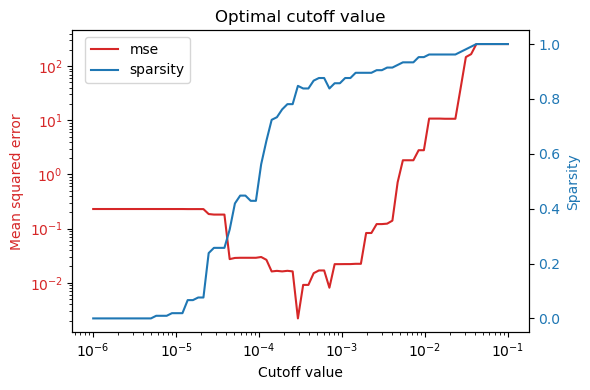

In [46]:
cutoffs = np.logspace(-6, -1, num=80)
sparsity = []
mses = []
# test_mses = []
# smapes = []
# all_weights = []
# best_weights = {'smape': (None, 1e25, 0),
#                'test_mse': (None, 1e25, 0),
#                'train_mse': (None, 1e25, 0)}
for k in tqdm(cutoffs, ncols=50):
    weights, _ = sparse_regression(X, dm, cutoff=k)
    mse = ((tf.matmul(tf.cast(X, dtype=tf.float32), tf.cast(weights, dtype=tf.float32)) - dm)**2).numpy().mean()
    mses.append(mse)
    sparsity.append((weights.numpy() == 0).sum()/len(weights.numpy().flatten()))

fig, ax1 = plt.subplots(dpi=100)

color = 'tab:red'
ax1.set_xlabel('Cutoff value')
ax1.set_ylabel('Mean squared error', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(cutoffs, mses, color=color, label='mse')
ax1.tick_params(axis='y')

handles, labels = ax1.get_legend_handles_labels()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Sparsity', color=color)  # we already handled the x-label with ax1
# ax2.plot(cutoffs, smapes, color='tab:purple', label='test smape')
ax2.plot(cutoffs, sparsity, color=color, label='sparsity')
ax2.set_xscale('log')
ax2.tick_params(axis='y', labelcolor=color)
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.13, 0., 0., 0.9))

plt.title('Optimal cutoff value')
fig.tight_layout()
plt.plot()
# plt.savefig('sparsity_vs_mse_lorenz.png', dpi=200)
